In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime


In [2]:
df_recent = pd.read_csv('../data/energy_recent_clean.csv', index_col = 'date')
df_past = pd.read_csv('../data/energy_past_clean.csv', index_col = 'date')

In [3]:
df_recent.head()

,Total(minus solar),Coal,Petroleum Liquids,Petroleum Coke,Natural Gas,Other Gases,Nuclear,Conventional Hydroelectric Power,other renewables,Wind,...,Other,Solar/PV,small-scale solar photovoltaic,all utility-scale solar.1,Petroleum,Renewable Total,Nonrenewable Total,Total,Renewable Percentage,Nonrenewable Percentage
date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,332493.0,177287.0,17300.0,812.0,42389.0,718.0,68707.0,18852.0,0.0,389.0,...,992.0,0.0,0.0,7.0,18112.0,24870.0,307213.0,333075.0,0.074668,0.922354
2001-02-01,282940.0,149735.0,9626.0,716.0,37967.0,676.0,61272.0,17473.0,0.0,431.0,...,872.0,0.0,0.0,13.0,10342.0,22770.0,259992.0,283634.0,0.080280,0.916646
2001-03-01,300707.0,155269.0,10981.0,752.0,44364.0,769.0,62141.0,20477.0,0.0,532.0,...,931.0,0.0,0.0,31.0,11733.0,26241.0,274276.0,301448.0,0.087050,0.909862
2001-04-01,278079.0,140671.0,10237.0,627.0,45843.0,698.0,56003.0,18013.0,0.0,685.0,...,957.0,0.0,0.0,39.0,10864.0,23801.0,254079.0,278837.0,0.085358,0.911210
2001-05-01,300492.0,151593.0,9641.0,749.0,50934.0,785.0,61512.0,19176.0,0.0,635.0,...,986.0,0.0,0.0,81.0,10390.0,24833.0,275214.0,301033.0,0.082493,0.914232


In [4]:
df_past.head()

,Coal,Petroleum,Natural Gas,Other Gases,Fossil Fuels Total,Nuclear,Hydro- electric Pumped Storage,Conventional Hydroelectric Power,Biomass Wood,Biomass Waste,Geo- thermal,Solar/PV,Wind,Renewable Total,Other,Total,Nonrenewable Total,Renewable Percentage,Nonrenewable Percentage
date,,,,,,,,,,,,,,,,,,,
1949-12-01,13550,2850,3700,0,20100,0,0,9480,40,0,0,0,0,9520,0,29610,20100,0.321513,0.678825
1950-12-01,15450,3370,4460,0,23280,0,0,10090,40,0,0,0,0,10130,0,33410,23280,0.303203,0.696797
1951-12-01,18520,2870,5660,0,27050,0,0,10440,40,0,0,0,0,10480,0,37530,27050,0.279243,0.720757
1952-12-01,19540,2970,6850,0,29360,0,0,10970,50,0,0,0,0,11020,0,40380,29360,0.272907,0.727093
1953-12-01,21880,3840,7980,0,33700,0,0,10960,40,0,0,0,0,11000,0,44700,33700,0.246085,0.753915


In [5]:
df_recent.set_index(pd.to_datetime(df_recent.index), inplace = True)

In [6]:
df_past.set_index(pd.to_datetime(df_past.index), inplace = True)

In [7]:
df_past.columns

Index(['Coal', 'Petroleum', 'Natural Gas', 'Other Gases', 'Fossil Fuels Total',
       'Nuclear', 'Hydro- electric Pumped Storage',
       'Conventional Hydroelectric Power', 'Biomass Wood', 'Biomass Waste',
       'Geo- thermal', 'Solar/PV', 'Wind', 'Renewable Total', 'Other', 'Total',
       'Nonrenewable Total', 'Renewable Percentage',
       'Nonrenewable Percentage'],
      dtype='object')

In [8]:
df_past = df_past.sort_values('date')

In [9]:
df_past['Nonrenewable Total'] = df_past['Fossil Fuels Total'] + df_past['Nuclear']

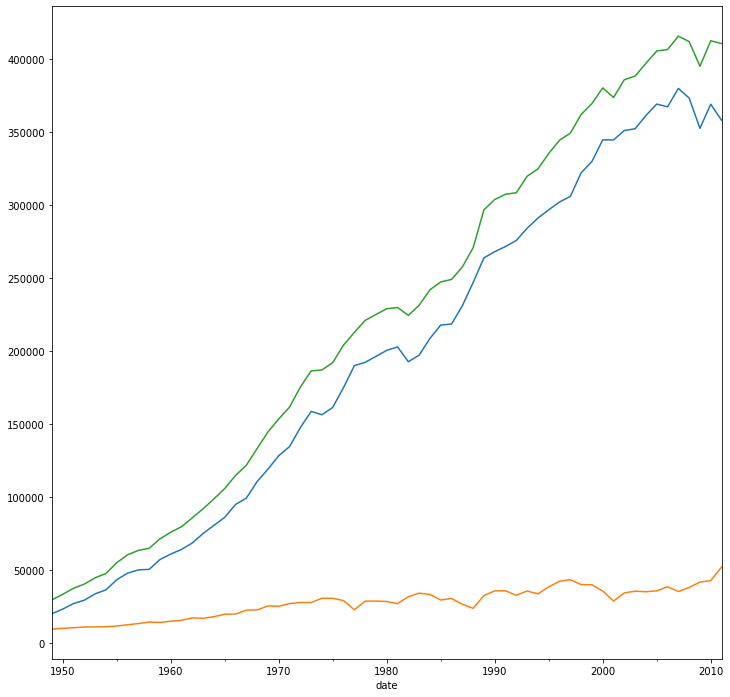

In [10]:
plt.figure(figsize = (12,12))
df_past['Nonrenewable Total'].plot()
df_past['Renewable Total'].plot()
df_past['Total'].plot()

In [11]:
df_past['Renewable Percentage'] = df_past['Renewable Total'] / df_past['Total']
df_past['Nonrenewable Percentage'] = df_past['Nonrenewable Total'] / df_past['Total']

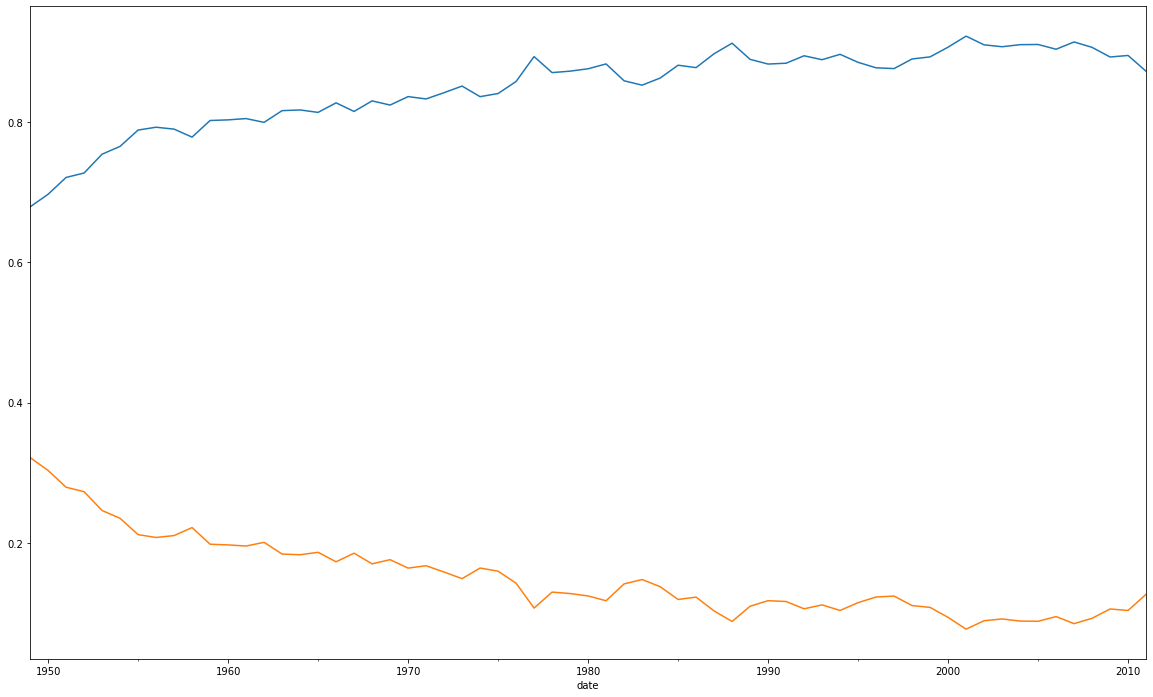

In [13]:
plt.figure(figsize = (20,12))
df_past['Nonrenewable Percentage'].plot()
df_past['Renewable Percentage'].plot()


In [13]:
df_recent.columns

Index(['Total(minus solar)', 'Coal', 'Petroleum Liquids', 'Petroleum Coke',
       'Natural Gas', 'Other Gases', 'Nuclear',
       'Conventional Hydroelectric Power', 'other renewables', 'Wind',
       'all utility-scale solar', 'Geo- thermal', 'Biomass Total',
       'Biomass Wood', 'Biomass Waste', 'Hydro- electric Pumped Storage',
       'Other', 'Solar/PV', 'small-scale solar photovoltaic',
       'all utility-scale solar.1', 'Petroleum'],
      dtype='object')

In [14]:
np.sum(df_recent[['Coal','Petroleum']])

Coal         31071612.0
Petroleum     1049854.0
dtype: float64

In [15]:
df_recent['Renewable Total'] =  df_recent['Conventional Hydroelectric Power']+df_recent['other renewables']+df_recent['Wind']+df_recent['Solar/PV']+df_recent['Geo- thermal']+df_recent['Biomass Total']
df_recent['Nonrenewable Total'] =df_recent['Coal']+df_recent['Petroleum']+df_recent['Natural Gas']+df_recent['Other Gases']+df_recent['Nuclear']

In [16]:
df_recent.head()

,Total(minus solar),Coal,Petroleum Liquids,Petroleum Coke,Natural Gas,Other Gases,Nuclear,Conventional Hydroelectric Power,other renewables,Wind,...,Biomass Wood,Biomass Waste,Hydro- electric Pumped Storage,Other,Solar/PV,small-scale solar photovoltaic,all utility-scale solar.1,Petroleum,Renewable Total,Nonrenewable Total
date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,332493.0,177287.0,17300.0,812.0,42389.0,718.0,68707.0,18852.0,0.0,389.0,...,3191.0,1209.0,-589.0,992.0,0.0,0.0,7.0,18112.0,24870.0,307213.0
2001-02-01,282940.0,149735.0,9626.0,716.0,37967.0,676.0,61272.0,17473.0,0.0,431.0,...,2697.0,1096.0,-707.0,872.0,0.0,0.0,13.0,10342.0,22770.0,259992.0
2001-03-01,300707.0,155269.0,10981.0,752.0,44364.0,769.0,62141.0,20477.0,0.0,532.0,...,2853.0,1189.0,-773.0,931.0,0.0,0.0,31.0,11733.0,26241.0,274276.0
2001-04-01,278079.0,140671.0,10237.0,627.0,45843.0,698.0,56003.0,18013.0,0.0,685.0,...,2821.0,1187.0,-796.0,957.0,0.0,0.0,39.0,10864.0,23801.0,254079.0
2001-05-01,300492.0,151593.0,9641.0,749.0,50934.0,785.0,61512.0,19176.0,0.0,635.0,...,2740.0,1211.0,-623.0,986.0,0.0,0.0,81.0,10390.0,24833.0,275214.0


In [17]:
df_recent['Total'] = df_recent['Nonrenewable Total'] + df_recent['Renewable Total'] + df_recent['Other']

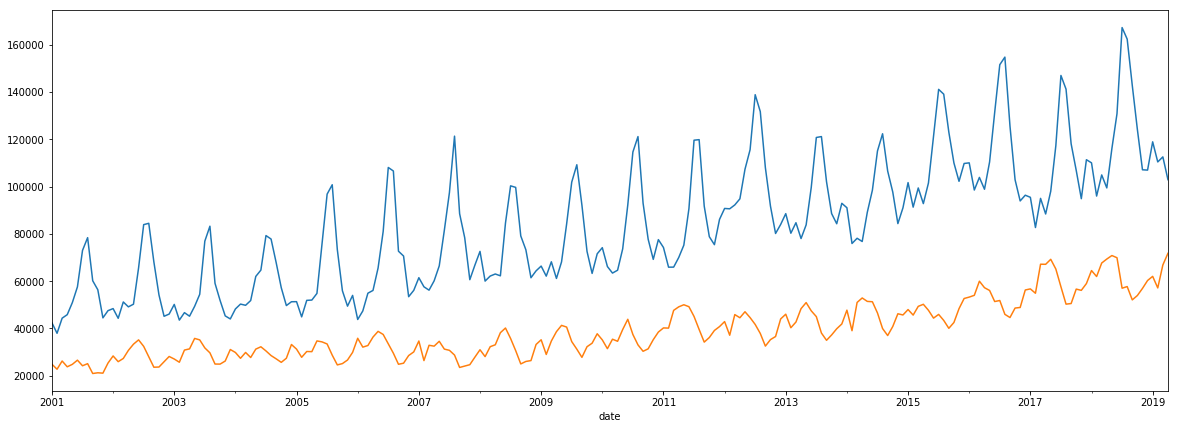

In [18]:
df_recent['Natural Gas'].plot(figsize = (20,7))
df_recent['Renewable Total'].plot()

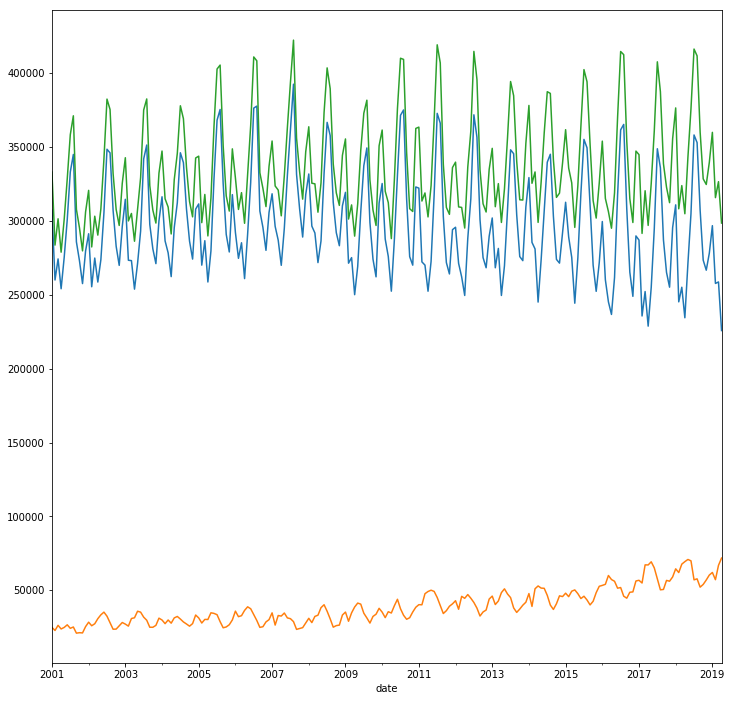

In [19]:
plt.figure(figsize = (12,12))
df_recent['Nonrenewable Total'].plot()
df_recent['Renewable Total'].plot()
df_recent['Total'].plot()


In [20]:
df_recent['Renewable Percentage'] = df_recent['Renewable Total']/df_recent['Total']
df_recent['Nonrenewable Percentage'] = df_recent['Nonrenewable Total']/df_recent['Total']

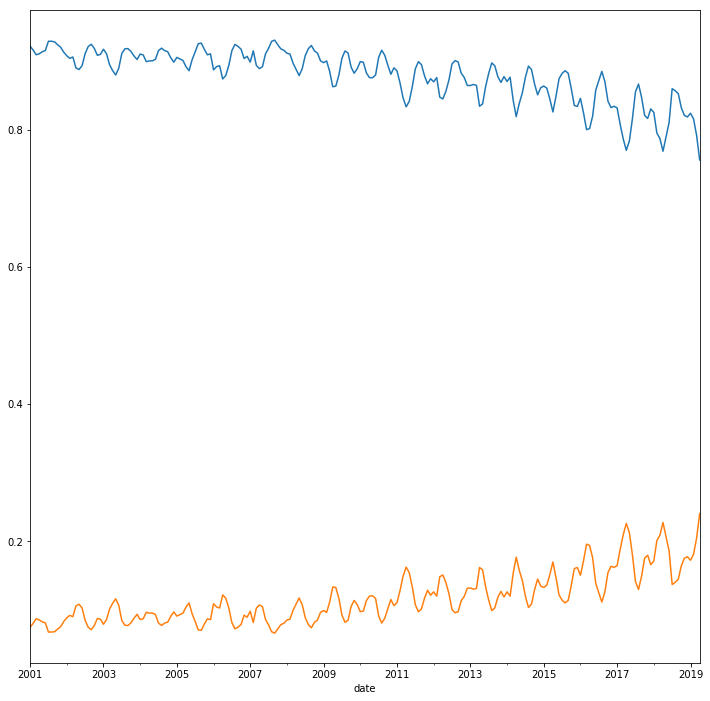

In [21]:
plt.figure(figsize = (12,12))
df_recent['Nonrenewable Percentage'].plot()
df_recent['Renewable Percentage'].plot()

In [22]:
df_recent.tail()

,Total(minus solar),Coal,Petroleum Liquids,Petroleum Coke,Natural Gas,Other Gases,Nuclear,Conventional Hydroelectric Power,other renewables,Wind,...,Other,Solar/PV,small-scale solar photovoltaic,all utility-scale solar.1,Petroleum,Renewable Total,Nonrenewable Total,Total,Renewable Percentage,Nonrenewable Percentage
date,,,,,,,,,,,,,,,,,,,,,
2018-12-01,337334.0,96825.0,930.0,807.0,106978.0,998.0,71657.0,23728.0,0.0,24825.0,...,1147.0,4962.0,1774.0,3188.0,1737.0,60289.0,278195.0,339631.0,0.177513,0.819110
2019-01-01,357690.0,101019.0,1316.0,820.0,118935.0,994.0,73701.0,24544.0,0.0,25165.0,...,1129.0,5590.0,1938.0,3652.0,2136.0,62039.0,296785.0,359953.0,0.172353,0.824510
2019-02-01,313278.0,80008.0,790.0,722.0,110428.0,1015.0,64715.0,22031.0,0.0,23047.0,...,925.0,5999.0,2085.0,3913.0,1512.0,57151.0,257678.0,315754.0,0.180998,0.816072
2019-03-01,323187.0,78454.0,802.0,637.0,112574.0,1143.0,65080.0,25400.0,0.0,26036.0,...,1018.0,8988.0,2968.0,6020.0,1439.0,66858.0,258690.0,326566.0,0.204730,0.792152
2019-04-01,295119.0,60099.0,772.0,450.0,102936.0,947.0,60581.0,25422.0,0.0,30217.0,...,957.0,10257.0,3309.0,6949.0,1222.0,71789.0,225785.0,298531.0,0.240474,0.756320


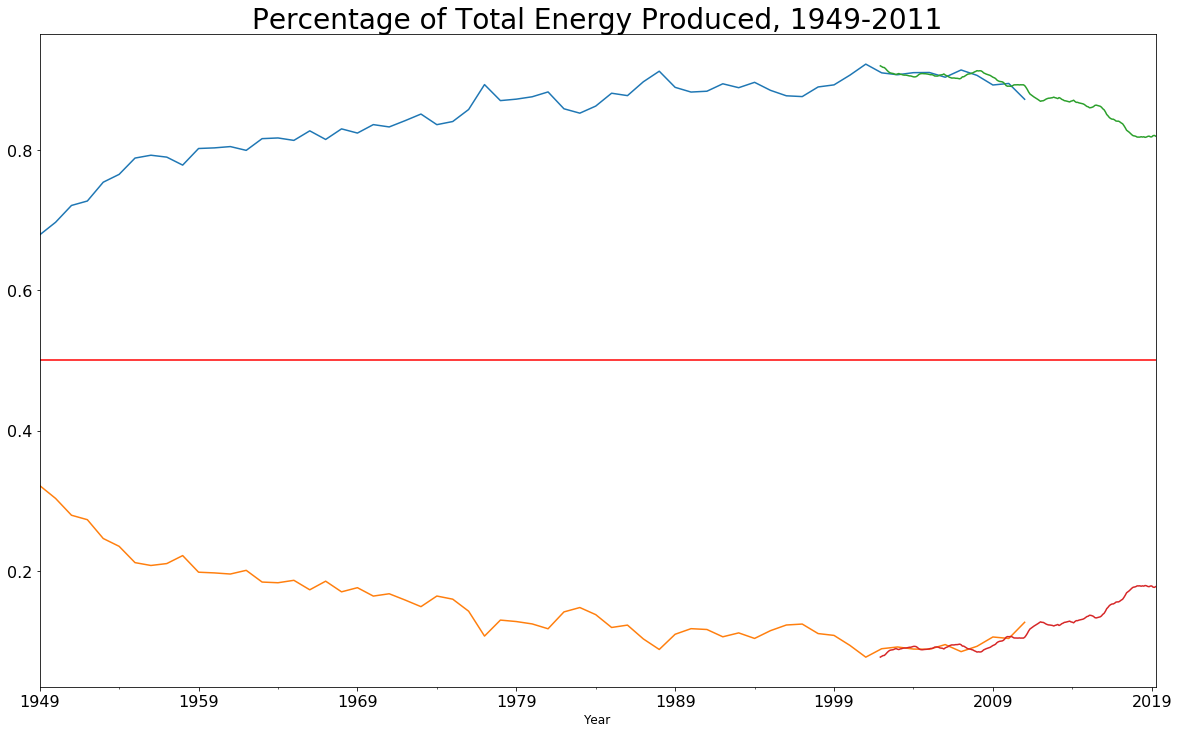

In [20]:
plt.figure(figsize = (20,12))
df_past['Nonrenewable Percentage'].plot()
df_past['Renewable Percentage'].plot()
df_recent['Nonrenewable Percentage'].rolling(12).mean().plot()
df_recent['Renewable Percentage'].rolling(12).mean().plot()
plt.axhline(0.5, color = 'red')
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.xlabel("Year", size = 12)
plt.title('Percentage of Total Energy Produced, 1949-2011', size = 28);

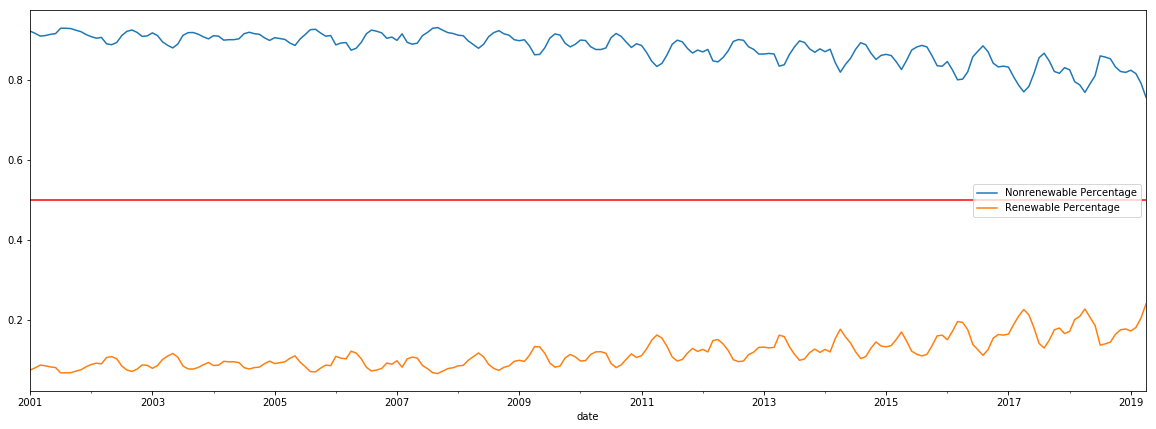

In [24]:
df_recent['Nonrenewable Percentage'].plot(figsize = (20,7))
df_recent['Renewable Percentage'].plot()
plt.axhline(0.5, color = 'red')
plt.plot()
plt.legend()

In [25]:
df_recent['Renewable Percentage'].describe()

count    220.000000
mean       0.116972
std        0.036968
min        0.066049
25%        0.087030
50%        0.107946
75%        0.135678
max        0.240474
Name: Renewable Percentage, dtype: float64

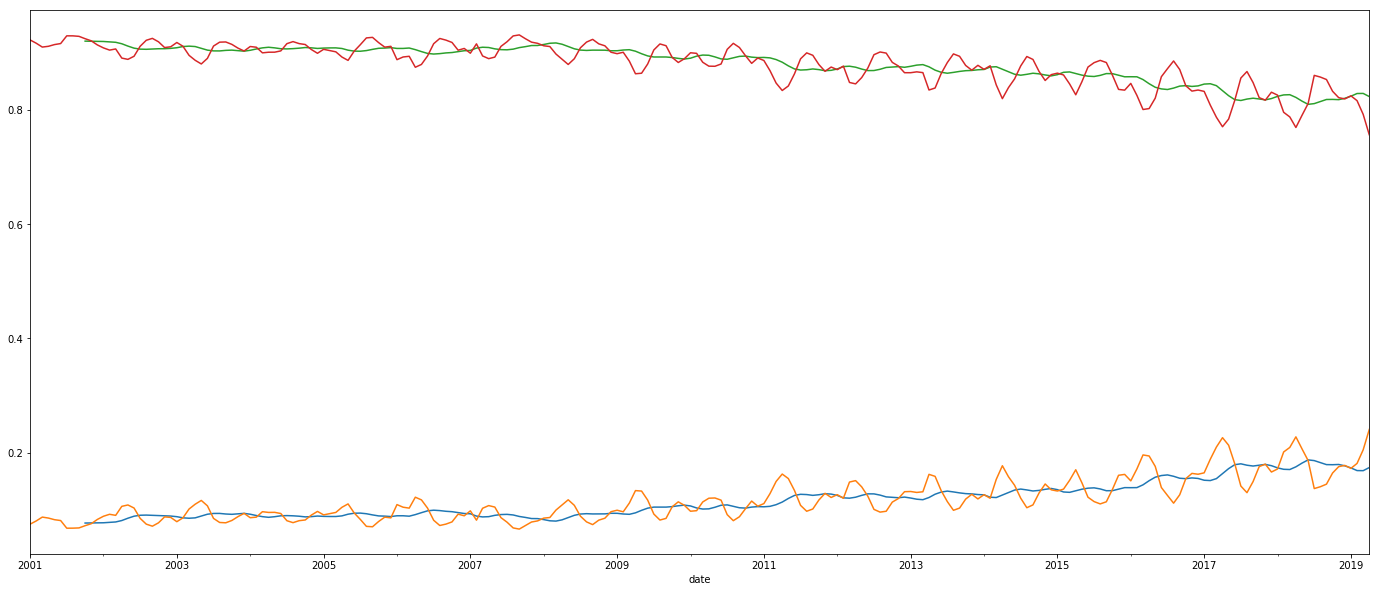

In [26]:

df_recent.rolling(10).mean()['Renewable Percentage'].plot(figsize = (24,10))
df_recent['Renewable Percentage'].plot()

df_recent.rolling(10).mean()['Nonrenewable Percentage'].plot(figsize = (24,10))
df_recent['Nonrenewable Percentage'].plot()

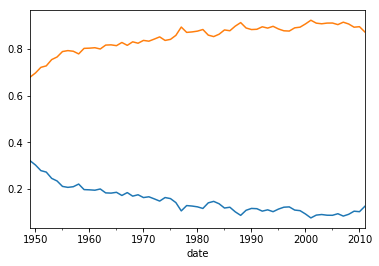

In [27]:
#df_past.rolling(3).mean()['Renewable Percentage'].plot(figsize = (24,10))
df_past['Renewable Percentage'].plot()

#df_past.rolling(3).mean()['Nonrenewable Percentage'].plot(figsize = (24,10))
df_past['Nonrenewable Percentage'].plot()

In [28]:
df_recent.columns

Index(['Total(minus solar)', 'Coal', 'Petroleum Liquids', 'Petroleum Coke',
       'Natural Gas', 'Other Gases', 'Nuclear',
       'Conventional Hydroelectric Power', 'other renewables', 'Wind',
       'all utility-scale solar', 'Geo- thermal', 'Biomass Total',
       'Biomass Wood', 'Biomass Waste', 'Hydro- electric Pumped Storage',
       'Other', 'Solar/PV', 'small-scale solar photovoltaic',
       'all utility-scale solar.1', 'Petroleum', 'Renewable Total',
       'Nonrenewable Total', 'Total', 'Renewable Percentage',
       'Nonrenewable Percentage'],
      dtype='object')

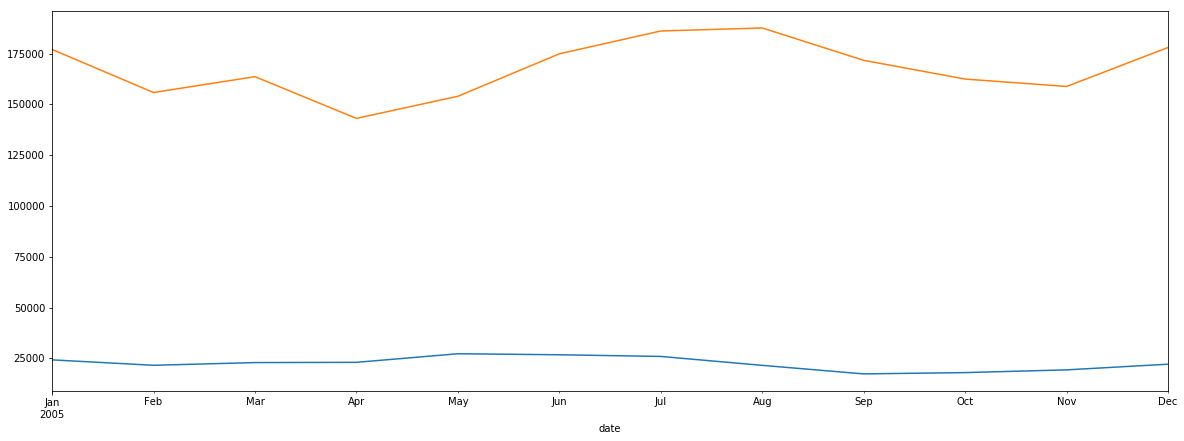

In [29]:
df_recent['2005']['Conventional Hydroelectric Power'].plot(figsize = (20,7))
df_recent['2005']['Coal'].plot()

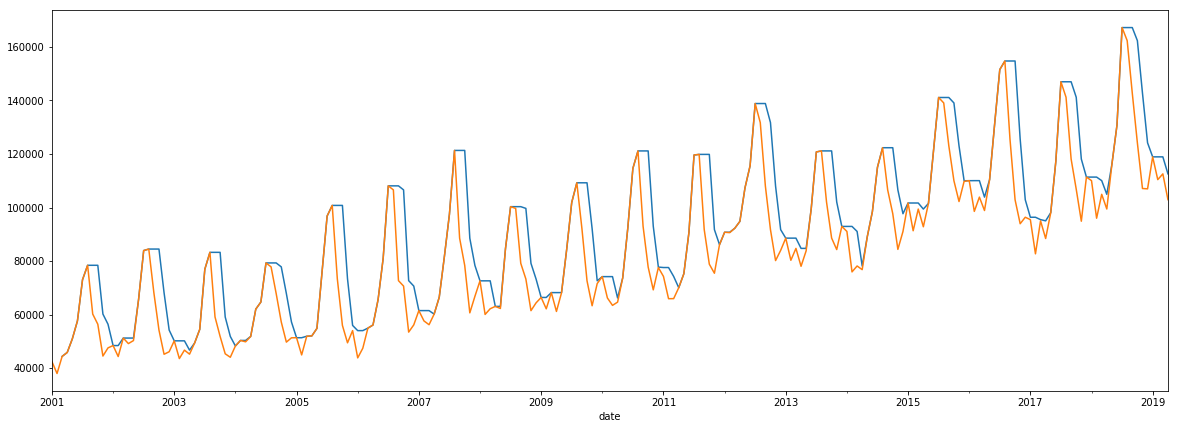

In [30]:
#df_past['Nuclear'].plot()
df_recent['Natural Gas'].rolling(3).max().plot(figsize = (20,7))
df_recent['Natural Gas'].plot()

In [31]:
df_recent['Nuclear'].rolling(12).mean().describe()

count      209.000000
mean     66025.862839
std       1140.032637
min      63644.500000
25%      65165.583333
50%      66097.833333
75%      66972.000000
max      68488.666667
Name: Nuclear, dtype: float64

In [35]:
features = [
    'Coal',
    'Natural Gas', 
    'Other Gases', 
    'Nuclear',
    'Conventional Hydroelectric Power', 
    'Wind',
    'Geo- thermal', 
    'Solar/PV', 
    'Petroleum', 
    'Renewable Total',
    'Nonrenewable Total', 
    'Total', 
    'Renewable Percentage',
    'Nonrenewable Percentage'
]

In [36]:
df_recent[features]

,Coal,Natural Gas,Other Gases,Nuclear,Conventional Hydroelectric Power,Wind,Geo- thermal,Solar/PV,Petroleum,Renewable Total,Nonrenewable Total,Total,Renewable Percentage,Nonrenewable Percentage
date,,,,,,,,,,,,,,
2001-01-01,177287.0,42389.0,718.0,68707.0,18852.0,389.0,1229.0,0.0,18112.0,24870.0,307213.0,333075.0,0.074668,0.922354
2001-02-01,149735.0,37967.0,676.0,61272.0,17473.0,431.0,1073.0,0.0,10342.0,22770.0,259992.0,283634.0,0.080280,0.916646
2001-03-01,155269.0,44364.0,769.0,62141.0,20477.0,532.0,1190.0,0.0,11733.0,26241.0,274276.0,301448.0,0.087050,0.909862
2001-04-01,140671.0,45843.0,698.0,56003.0,18013.0,685.0,1095.0,0.0,10864.0,23801.0,254079.0,278837.0,0.085358,0.911210
2001-05-01,151593.0,50934.0,785.0,61512.0,19176.0,635.0,1071.0,0.0,10390.0,24833.0,275214.0,301033.0,0.082493,0.914232
2001-06-01,162616.0,57603.0,733.0,68023.0,20728.0,670.0,1088.0,0.0,11822.0,26602.0,300797.0,328377.0,0.081011,0.916011
2001-07-01,179060.0,73030.0,840.0,69166.0,18079.0,635.0,1179.0,0.0,11042.0,24232.0,333138.0,358392.0,0.067613,0.929535
2001-08-01,183116.0,78410.0,848.0,68389.0,18914.0,577.0,1167.0,0.0,14229.0,25122.0,344992.0,371162.0,0.067685,0.929492
2001-09-01,154158.0,60181.0,767.0,63378.0,15256.0,490.0,1139.0,0.0,7343.0,20961.0,285827.0,307792.0,0.068101,0.928637


In [37]:
df_past[features]

,Coal,Natural Gas,Other Gases,Nuclear,Conventional Hydroelectric Power,Wind,Geo- thermal,Solar/PV,Petroleum,Renewable Total,Nonrenewable Total,Total,Renewable Percentage,Nonrenewable Percentage
date,,,,,,,,,,,,,,
1949-12-01,13550,3700,0,0,9480,0,0,0,2850,9520,20100,29610,0.321513,0.678825
1950-12-01,15450,4460,0,0,10090,0,0,0,3370,10130,23280,33410,0.303203,0.696797
1951-12-01,18520,5660,0,0,10440,0,0,0,2870,10480,27050,37530,0.279243,0.720757
1952-12-01,19540,6850,0,0,10970,0,0,0,2970,11020,29360,40380,0.272907,0.727093
1953-12-01,21880,7980,0,0,10960,0,0,0,3840,11000,33700,44700,0.246085,0.753915
1954-12-01,23910,9370,0,0,11160,0,0,0,3150,11190,36440,47630,0.234936,0.765064
1955-12-01,30140,9530,0,0,11620,0,0,0,3710,11650,43380,55030,0.211703,0.788297
1956-12-01,33850,10400,0,0,12520,0,0,0,3590,12540,47850,60390,0.207650,0.792350
1957-12-01,34640,11420,0,0,13340,0,0,0,4050,13350,50110,63460,0.210369,0.789631


In [57]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

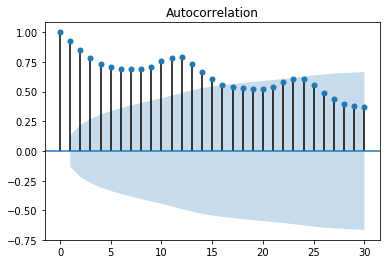

In [62]:
plot_acf(df_recent['Renewable Total'], lags = 30);

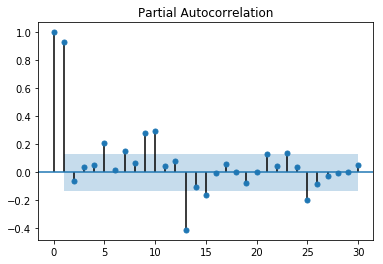

In [63]:
plot_pacf(df_recent['Renewable Total'], lags = 30);

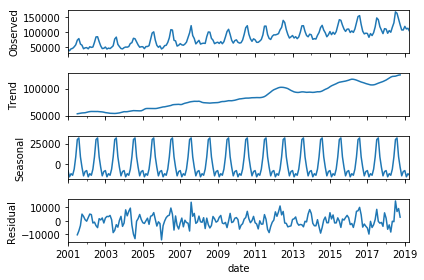

In [46]:
decomp = seasonal_decompose(df_recent['Natural Gas'])

decomp.plot();

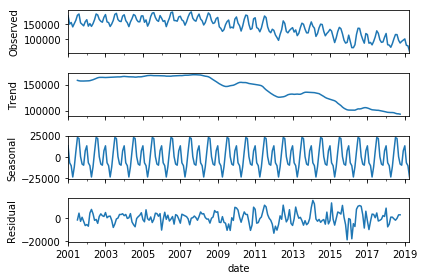

In [47]:
decomp = seasonal_decompose(df_recent['Coal'])

decomp.plot();

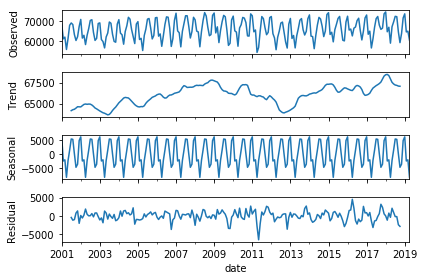

In [65]:
decomp = seasonal_decompose(df_recent['Nuclear'])

decomp.plot();

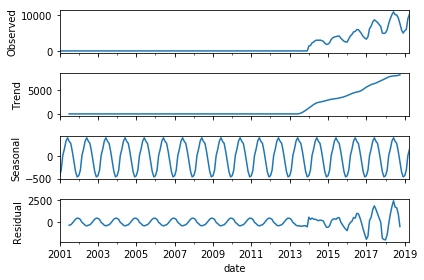

In [49]:
decomp = seasonal_decompose(df_recent['Solar/PV'])

decomp.plot();

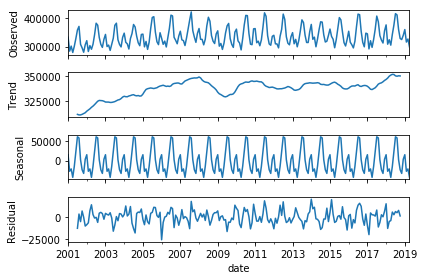

In [50]:
decomp = seasonal_decompose(df_recent['Total'])

decomp.plot();

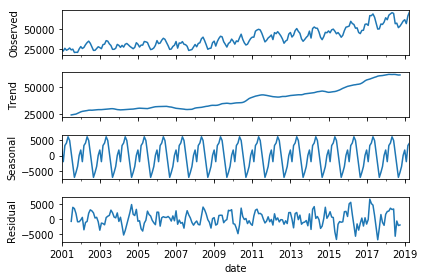

In [51]:
decomp = seasonal_decompose(df_recent['Renewable Total'])

decomp.plot();

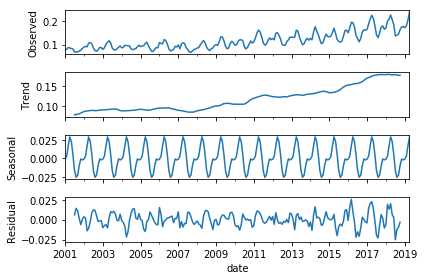

In [52]:
decomp = seasonal_decompose(df_recent['Renewable Percentage'])

decomp.plot();

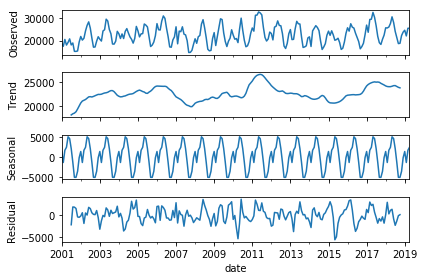

In [53]:
decomp = seasonal_decompose(df_recent['Conventional Hydroelectric Power'])

decomp.plot();

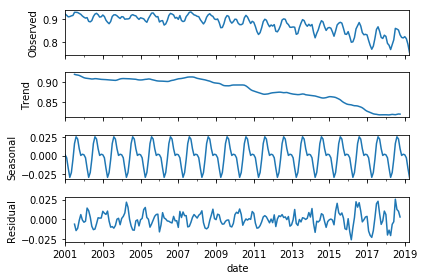

In [55]:
decomp = seasonal_decompose(df_recent['Nonrenewable Percentage'])

decomp.plot();

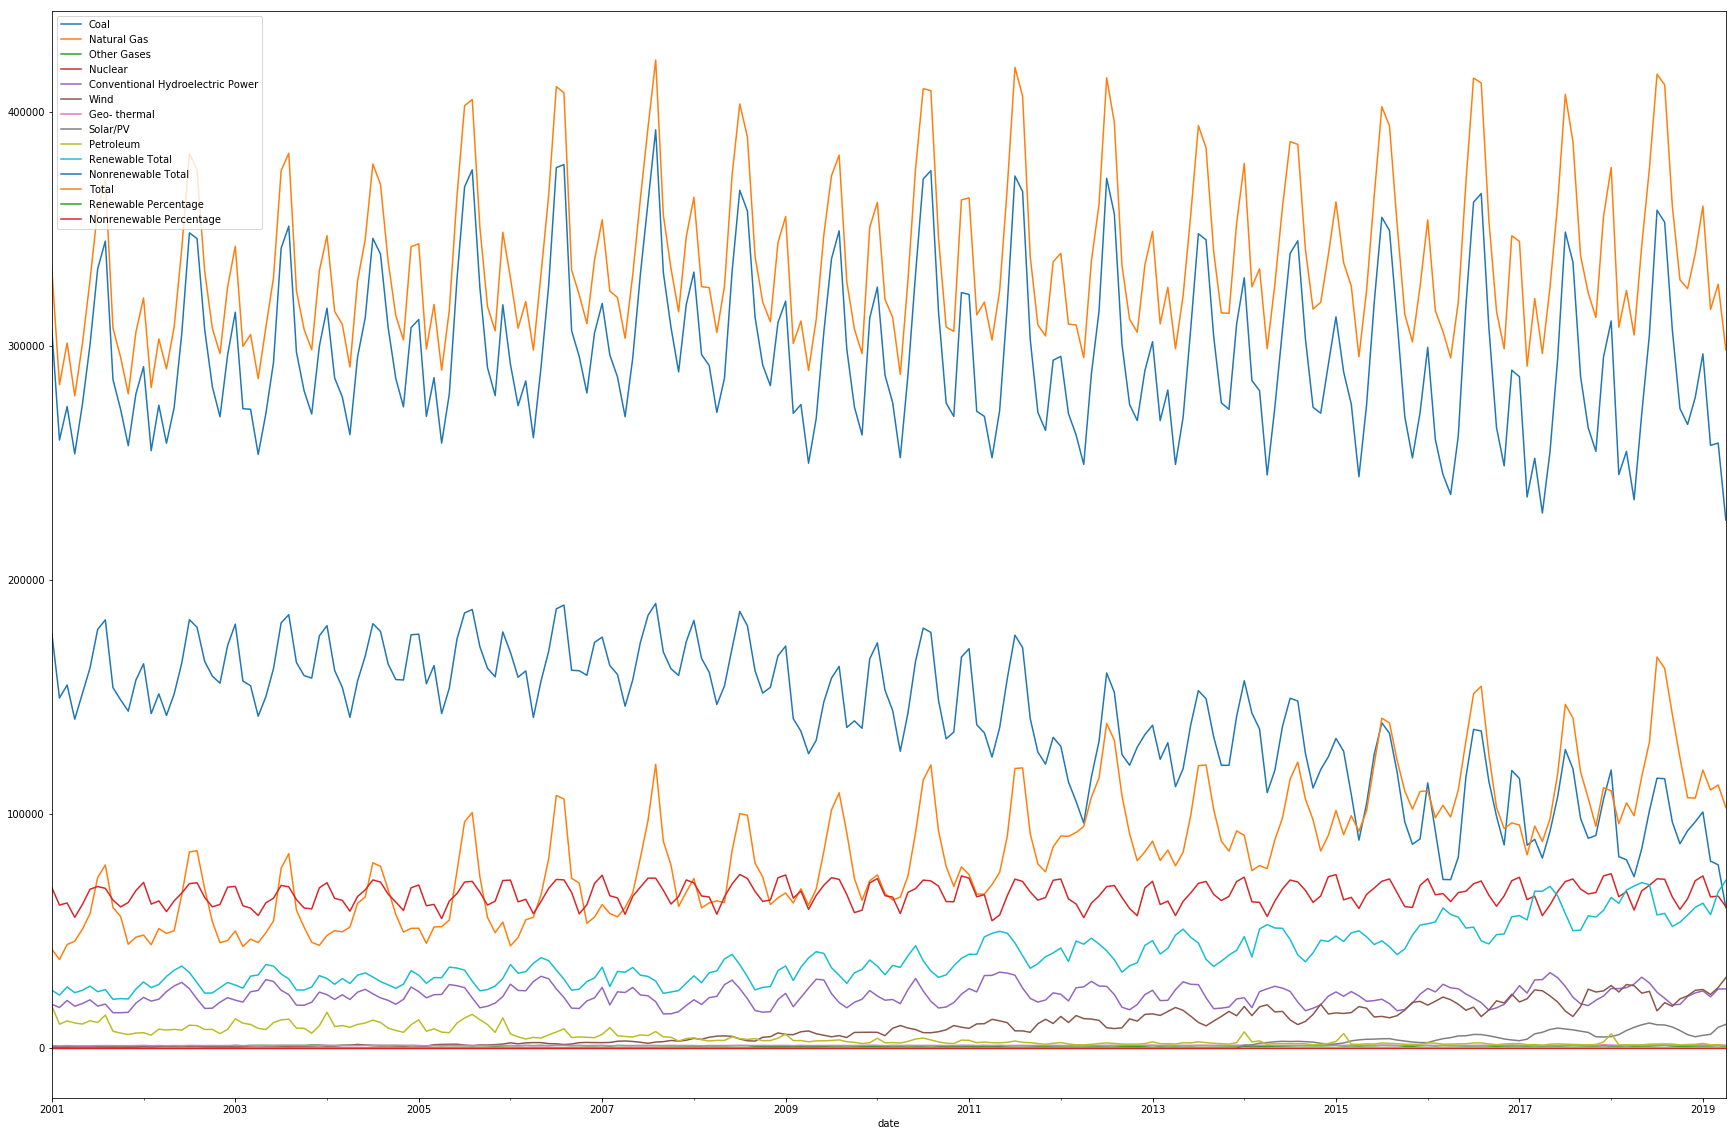

In [67]:
df_recent[features].plot(figsize = (30,20))

In [68]:
df_recent.to_csv('../data/energy_recent_clean.csv')
df_past.to_csv('../data/energy_past_clean.csv')